<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=254735769" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 115.3 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [5]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [6]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [7]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [8]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [10]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


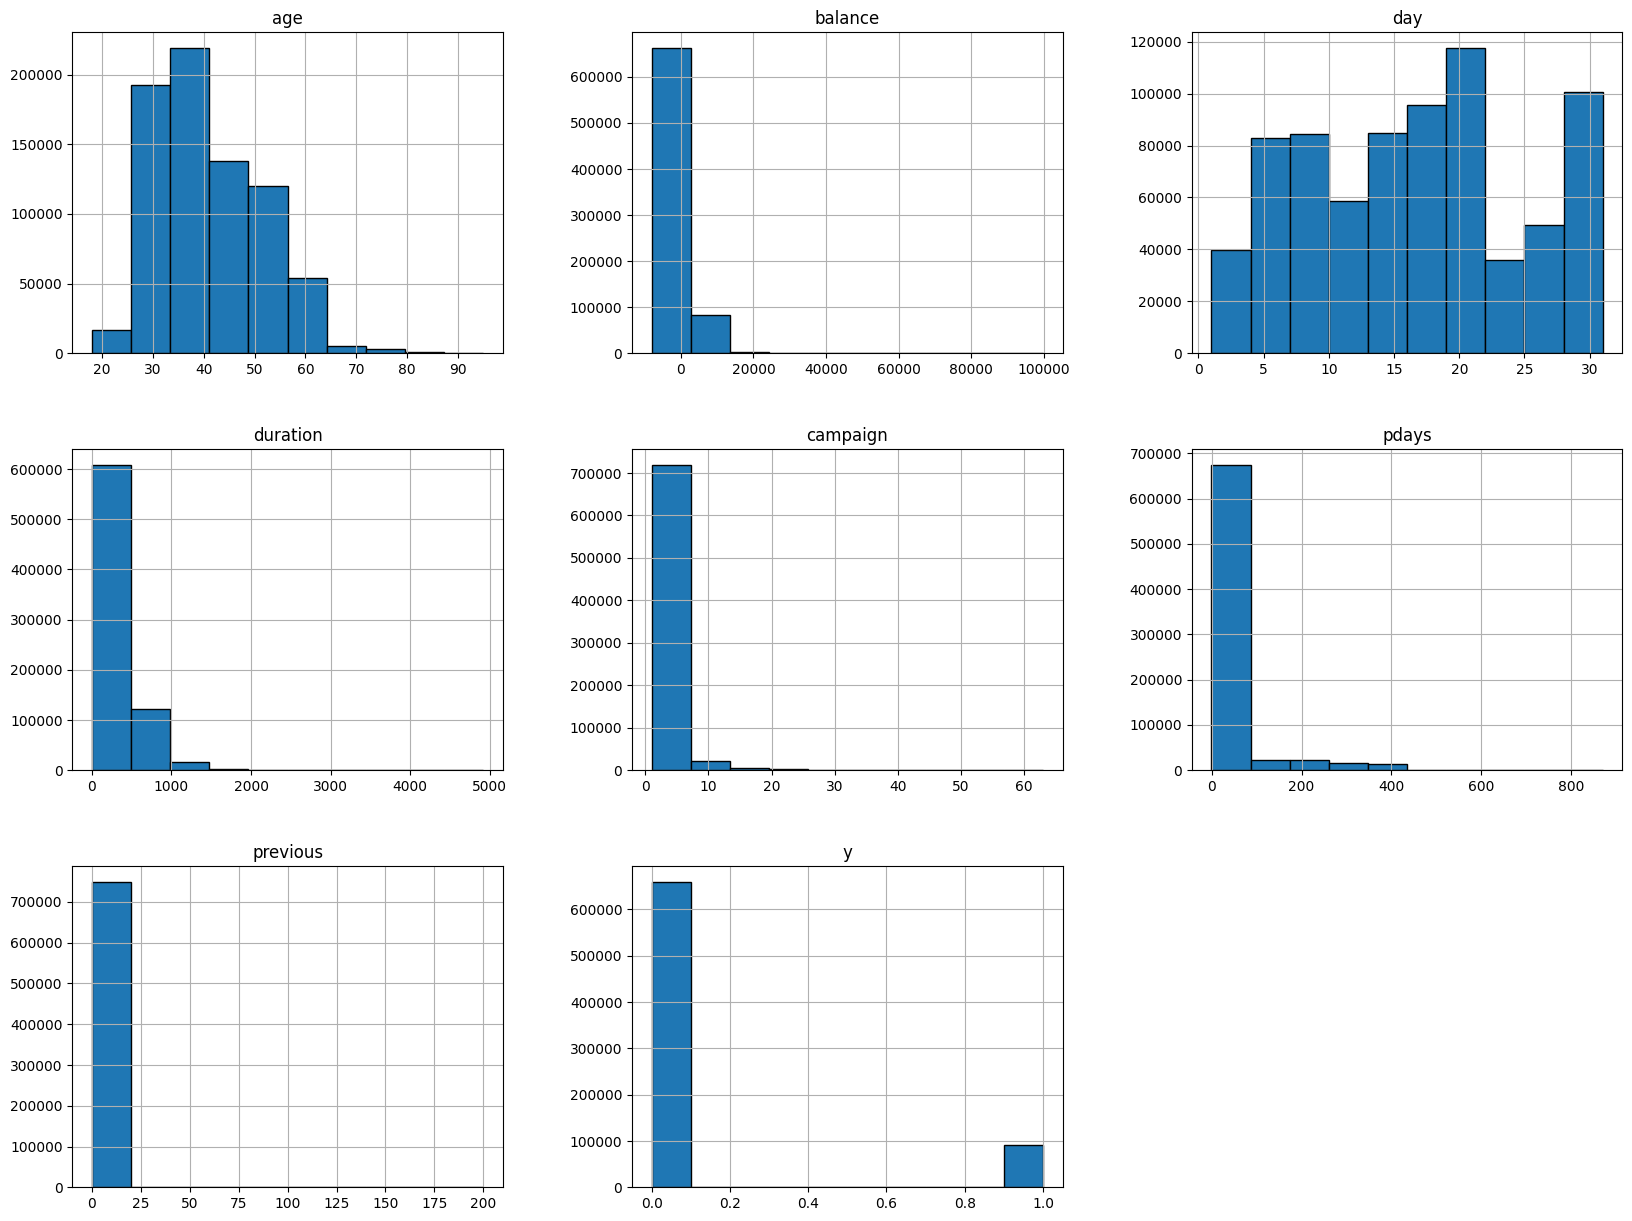

In [13]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [15]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [16]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [17]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [18]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [19]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [20]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

## Neural Networks

In [21]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.02754228748381138, valley=0.002511886414140463)

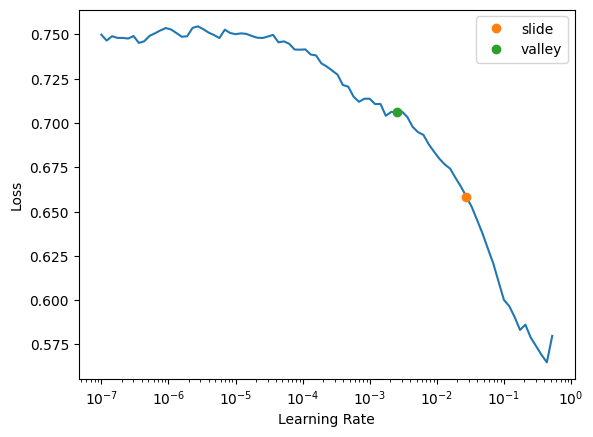

In [22]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [23]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.166732,0.166016,0.957433,01:29
1,0.169187,0.162128,0.958878,01:28


CPU times: user 2min 56s, sys: 1.29 s, total: 2min 57s
Wall time: 2min 58s


In [24]:
dl = test_dl

In [25]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [26]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [27]:
a_preds.shape

torch.Size([250000, 2])

In [28]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [29]:
nn_preds_x

tensor([[8.6565e-01, 1.3435e-01],
        [9.9897e-01, 1.0285e-03],
        [9.9911e-01, 8.9390e-04],
        ...,
        [6.9663e-01, 3.0337e-01],
        [9.9044e-01, 9.5567e-03],
        [1.3674e-01, 8.6326e-01]])

In [30]:
nn_preds_y

tensor([[9.9542e-01, 4.5843e-03],
        [7.4497e-01, 2.5503e-01],
        [9.9989e-01, 1.0745e-04],
        ...,
        [4.0165e-01, 5.9835e-01],
        [9.9732e-01, 2.6784e-03],
        [8.4673e-01, 1.5327e-01]])

In [31]:
a_preds

tensor([[9.9542e-01, 4.5843e-03],
        [7.4497e-01, 2.5503e-01],
        [9.9989e-01, 1.0745e-04],
        ...,
        [4.0165e-01, 5.9835e-01],
        [9.9732e-01, 2.6784e-03],
        [8.4673e-01, 1.5327e-01]])

In [32]:
nn_preds_proba

tensor([4.5843e-03, 2.5503e-01, 1.0745e-04,  ..., 5.9835e-01, 2.6784e-03,
        1.5327e-01])

In [33]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([4.5843e-03, 2.5503e-01, 1.0745e-04,  ..., 5.9835e-01, 2.6784e-03,
        1.5327e-01])

In [34]:
final_preds.shape

torch.Size([250000])

In [35]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.004584
750001,0.255030
750002,0.000107
750003,0.000198
750004,0.030998
...,...
999995,0.000179
999996,0.070401
999997,0.598349


## Decision Trees

### Random Forests

In [36]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 1min 57s, sys: 260 ms, total: 1min 57s
Wall time: 1min 57s


0.9632582551559967

In [37]:
rf_preds_probs,rf_preds_probs.shape

(tensor([2.7684e-03, 1.5751e-01, 0.0000e+00,  ..., 7.1085e-01, 1.6464e-04,
         1.2700e-01]),
 torch.Size([250000]))

In [38]:
rf_preds_probs 

tensor([2.7684e-03, 1.5751e-01, 0.0000e+00,  ..., 7.1085e-01, 1.6464e-04,
        1.2700e-01])

In [39]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [40]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.467615
10,balance,0.095327
9,age,0.068377
7,month,0.066823
11,day,0.056087
8,poutcome,0.045520
4,housing,0.037084
14,pdays,0.032688
6,contact,0.031573
0,job,0.025763


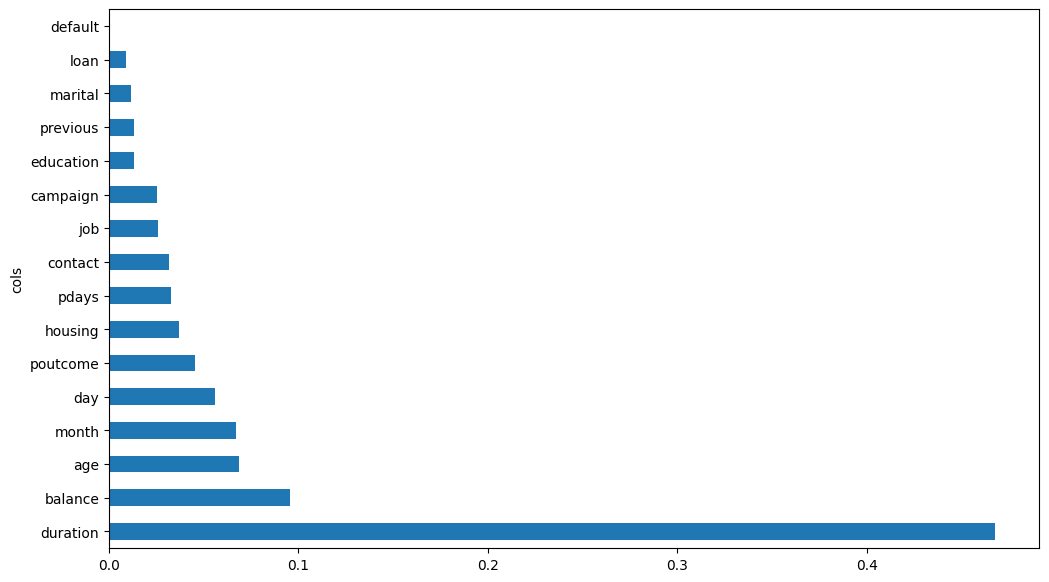

In [41]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

In [42]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002768
750001,0.157509
750002,0.000000
750003,0.000000
750004,0.056954
...,...
999995,0.000000
999996,0.133048
999997,0.710845


## Gradient Boosting

### XGBoost

In [43]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 8.36 s, sys: 57.8 ms, total: 8.42 s
Wall time: 4.3 s


0.9653924494210584

In [44]:
xgb_preds_proba

tensor([2.8506e-03, 5.9614e-02, 2.1624e-04,  ..., 9.5949e-01, 7.2513e-04,
        1.1969e-01])

#### RF Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

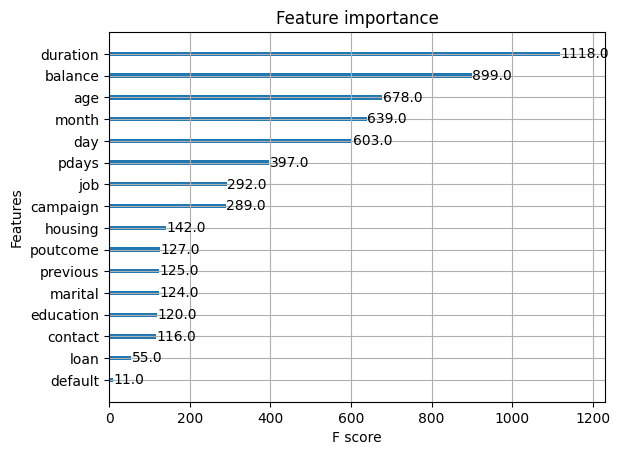

In [45]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

In [46]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002851
750001,0.059614
750002,0.000216
750003,0.000077
750004,0.027826
...,...
999995,0.000220
999996,0.077138
999997,0.959488


### LGBM

In [47]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72464, number of negative: 527536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120773 -> initscore=-1.985127
[LightGBM] [Info] Start training from score -1.985127
CPU times: user 12.3 s, sys: 121 ms, total: 12.4 s
Wall time: 6.4 s


0.9644449602731439

In [48]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9961, 0.0039],
         [0.8852, 0.1148],
         [0.9988, 0.0012],
         ...,
         [0.2375, 0.7625],
         [0.9989, 0.0011],
         [0.8929, 0.1071]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

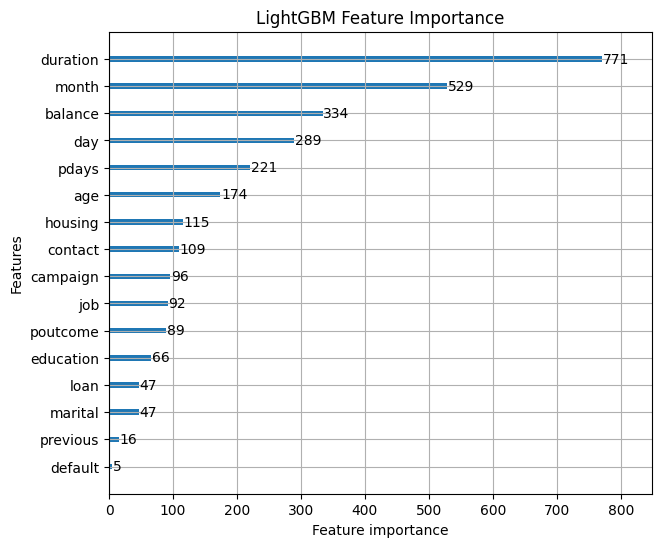

In [49]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

In [50]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003855
750001,0.114767
750002,0.001230
750003,0.000488
750004,0.037953
...,...
999995,0.000509
999996,0.106988
999997,0.762546


### CatBoost

In [51]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 3min 51s, sys: 9.92 s, total: 4min 1s
Wall time: 1min 2s


0.9666944817819301

#### CatBoost Feature Importance

In [52]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   45.349857
6    contact   11.031578
7      month   10.676686
10   balance    7.507403
4    housing    5.607421
11       day    4.247044
9        age    2.769894
14     pdays    2.395468
8   poutcome    2.349774
13  campaign    2.193325


## Ensembling

### Averaging

#### CatBoost + XGBoost

In [53]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([2.6067e-03, 9.2513e-02, 1.9748e-04,  ..., 7.6162e-01, 7.1716e-04,
        1.1965e-01])

In [54]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([1.1802e-01, 9.4274e-04, 5.8609e-04,  ..., 3.4048e-01, 5.6062e-03,
        9.5860e-01])

In [55]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.966785188170637

#### CatBoost + LGBM

In [56]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([0.0031, 0.1201, 0.0007,  ..., 0.6631, 0.0009, 0.1134])

In [57]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [58]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9665599800644328

#### XGBoost + LGBM

#### CatBoost + LGBM + XGBoost

In [59]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([3.0228e-03, 9.9931e-02, 5.4157e-04,  ..., 7.6193e-01, 8.4417e-04,
        1.1548e-01])

In [60]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9666974180059128

In [61]:
!rm submission.csv
sub_df['y'] = cat_lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003023
750001,0.099931
750002,0.000542
750003,0.000220
750004,0.041647
...,...
999995,0.000342
999996,0.083466
999997,0.761926


### AutoGluon

In [62]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
#Time_limit = 3600*8
Time_limit = 300
problem_type='binary'

In [63]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={
        'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    }
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250807_074522"
2025-08-07 07:45:22,649	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-07 07:45:25,531	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning generated.
(_ray_fit pid=682) 1 warning genera

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMXT_BAG_L1   0.962574     roc_auc      16.356607  153.120357               16.356607         153.120357            1       True          1
1  WeightedEnsemble_L3   0.962574     roc_auc      16.482601  160.331248                0.125994           7.210891            3       True          4
2  WeightedEnsemble_L2   0.962574     roc_auc      16.488560  153.273804                0.131953           0.153446            2       True          2
3    LightGBMXT_BAG_L2   0.961776     roc_auc      20.483397  225.535921                4.126790          72.415564            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  

In [64]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [65]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMXT_BAG_L1   0.962574     roc_auc      16.356607  153.120357               16.356607         153.120357            1       True          1
1  WeightedEnsemble_L3   0.962574     roc_auc      16.482601  160.331248                0.125994           7.210891            3       True          4
2  WeightedEnsemble_L2   0.962574     roc_auc      16.488560  153.273804                0.131953           0.153446            2       True          2
3    LightGBMXT_BAG_L2   0.961776     roc_auc      20.483397  225.535921                4.126790          72.415564            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  

In [66]:
%%time
predictor.leaderboard()

CPU times: user 4.14 ms, sys: 977 µs, total: 5.11 ms
Wall time: 4.6 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.962574,roc_auc,16.356607,153.120357,16.356607,153.120357,1,True,1
1,WeightedEnsemble_L3,0.962574,roc_auc,16.482601,160.331248,0.125994,7.210891,3,True,4
2,WeightedEnsemble_L2,0.962574,roc_auc,16.488560,153.273804,0.131953,0.153446,2,True,2
3,LightGBMXT_BAG_L2,0.961776,roc_auc,20.483397,225.535921,4.126790,72.415564,2,True,3


In [67]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

CPU times: user 44.5 s, sys: 138 ms, total: 44.7 s
Wall time: 22.6 s


,0,1
id,,
750000,0.992130,0.007870
750001,0.824864,0.175136
750002,0.999170,0.000830
750003,0.999599,0.000401
750004,0.980511,0.019489


In [68]:
predictions = autogluon_preds_proba

In [69]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

CPU times: user 45 s, sys: 130 ms, total: 45.1 s
Wall time: 22.8 s


id
750000    0.007870
750001    0.175136
750002    0.000830
750003    0.000401
750004    0.019489
Name: y, dtype: float32

In [70]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [71]:
autogluon_preds_proba.values

array([0.00786965, 0.17513601, 0.00082989, ..., 0.82866824, 0.00185497, 0.12282795], dtype=float32)

In [72]:
!rm submission.csv
sub_df['y'] = autogluon_preds_proba.values
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.007870
750001,0.175136
750002,0.000830
750003,0.000401
750004,0.019489
...,...
999995,0.000510
999996,0.085941
999997,0.828668


In [73]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [74]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [75]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.966785
3,CatBoost,0.966694
5,CatBoost_LGBM_average,0.966560
1,XGBoost,0.965392
2,LGBM,0.964445
0,Random Forest,0.963258
